In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

# Import the csv file 

In [2]:
df=pd.read_csv("Home values.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,102001,0,United States,country,NaN,111321.569992,111517.355022,111760.009581,112280.337886,112879.053073,...,320375.873221,325910.452225,330524.847053,332983.823812,333452.459577,332352.905581,331306.296536,330461.336763,329377.150663,328745.479499
1,394913,1,"New York, NY",msa,NY,181391.978283,182163.920827,182941.816323,184517.289007,186145.623673,...,561266.518788,567909.385339,574055.610927,578134.716919,579224.718318,577396.782695,575299.589457,573540.863283,571164.073507,571129.838070
2,753899,2,"Los Angeles, CA",msa,CA,216288.490773,217088.519916,218157.449825,220302.779364,222656.372907,...,866791.495154,877943.130000,884285.405128,885962.605709,882724.203373,876940.834056,871737.330049,868143.714271,863937.570939,855850.857068
3,394463,3,"Chicago, IL",msa,IL,140446.943045,140580.106890,140830.703348,141455.083597,142204.821065,...,285882.216893,288752.379917,290693.534949,291105.685730,290463.095460,288855.970922,287575.753223,286890.141677,286224.024872,286791.742540
4,394514,4,"Dallas, TX",msa,TX,125298.507395,125361.207864,125432.064976,125609.326323,125835.785023,...,357099.572102,363814.416450,369218.740076,371931.519457,371959.054317,370048.703993,368024.002682,366169.955027,363708.333423,361199.235478


In [3]:
df.shape

(896, 282)

# Data cleaning for a better csv file

In [4]:
df.groupby('RegionType')['RegionType'].agg('count')

RegionType
country      1
msa        895
Name: RegionType, dtype: int64

In [5]:
df2=df.drop(['RegionName','RegionType'],axis='columns')

In [6]:
df2

,RegionID,SizeRank,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,102001,0,NaN,111321.569992,111517.355022,111760.009581,112280.337886,112879.053073,113521.101023,114201.562138,...,320375.873221,325910.452225,330524.847053,332983.823812,333452.459577,332352.905581,331306.296536,330461.336763,329377.150663,328745.479499
1,394913,1,NY,181391.978283,182163.920827,182941.816323,184517.289007,186145.623673,187950.161314,189921.539179,...,561266.518788,567909.385339,574055.610927,578134.716919,579224.718318,577396.782695,575299.589457,573540.863283,571164.073507,571129.838070
2,753899,2,CA,216288.490773,217088.519916,218157.449825,220302.779364,222656.372907,224999.313256,227389.757749,...,866791.495154,877943.130000,884285.405128,885962.605709,882724.203373,876940.834056,871737.330049,868143.714271,863937.570939,855850.857068
3,394463,3,IL,140446.943045,140580.106890,140830.703348,141455.083597,142204.821065,143045.158706,143936.162950,...,285882.216893,288752.379917,290693.534949,291105.685730,290463.095460,288855.970922,287575.753223,286890.141677,286224.024872,286791.742540
4,394514,4,TX,125298.507395,125361.207864,125432.064976,125609.326323,125835.785023,126061.390399,126297.566576,...,357099.572102,363814.416450,369218.740076,371931.519457,371959.054317,370048.703993,368024.002682,366169.955027,363708.333423,361199.235478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,923,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99839.082751,99988.655383,101094.811305,102088.632624,102019.301883,100560.784239,98939.685974,96917.740747,95567.124532,97506.934971
892,394743,924,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,368749.485087,372923.450929,377954.462244,381534.290426,383410.199577,383595.478971,383873.856370,383512.647220,382119.768472,380399.561630
893,753874,925,CO,97735.186551,97983.297443,98447.577031,99108.812746,99877.171634,100602.779396,101779.855347,...,248673.878642,251446.882933,254593.888436,257004.340268,259030.660071,260389.125638,262074.550909,263679.368877,265066.272023,266213.379745
894,394767,926,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85943.169691,84583.437116,83661.249947,83040.009904,82447.310599,81859.496763,81783.952800,81323.744347,80967.904070,84048.744143


# Removing null values in each columns

In [7]:
df2.isnull().sum()

RegionID        0
SizeRank        0
StateName       1
2000-01-31    464
2000-02-29    463
             ... 
2022-09-30      1
2022-10-31      0
2022-11-30      0
2022-12-31      0
2023-01-31      0
Length: 280, dtype: int64

In [8]:
df3=df2.dropna()

In [9]:
df3.isnull().sum()

RegionID      0
SizeRank      0
StateName     0
2000-01-31    0
2000-02-29    0
             ..
2022-09-30    0
2022-10-31    0
2022-11-30    0
2022-12-31    0
2023-01-31    0
Length: 280, dtype: int64

In [10]:
df3.shape

(298, 280)

In [11]:
df3

,RegionID,SizeRank,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
1,394913,1,NY,181391.978283,182163.920827,182941.816323,184517.289007,186145.623673,187950.161314,189921.539179,...,5.612665e+05,5.679094e+05,5.740556e+05,5.781347e+05,5.792247e+05,5.773968e+05,5.752996e+05,5.735409e+05,5.711641e+05,5.711298e+05
2,753899,2,CA,216288.490773,217088.519916,218157.449825,220302.779364,222656.372907,224999.313256,227389.757749,...,8.667915e+05,8.779431e+05,8.842854e+05,8.859626e+05,8.827242e+05,8.769408e+05,8.717373e+05,8.681437e+05,8.639376e+05,8.558509e+05
3,394463,3,IL,140446.943045,140580.106890,140830.703348,141455.083597,142204.821065,143045.158706,143936.162950,...,2.858822e+05,2.887524e+05,2.906935e+05,2.911057e+05,2.904631e+05,2.888560e+05,2.875758e+05,2.868901e+05,2.862240e+05,2.867917e+05
5,394692,5,TX,115156.316351,115174.676779,115091.929476,115135.800528,115177.594361,115354.663731,115528.590582,...,2.880931e+05,2.926715e+05,2.966752e+05,2.993713e+05,3.004572e+05,3.002230e+05,2.996248e+05,2.989722e+05,2.976362e+05,2.960826e+05
6,395209,6,VA,173207.149987,173347.993266,173607.120741,174193.590790,175085.107926,176158.865569,177496.026128,...,5.257564e+05,5.320521e+05,5.355979e+05,5.355471e+05,5.324493e+05,5.280374e+05,5.250904e+05,5.235325e+05,5.222166e+05,5.213080e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,394498,878,GA,54673.717620,54847.996863,54956.713608,55250.333084,55584.052192,55862.921915,56047.911664,...,1.109759e+05,1.119056e+05,1.130808e+05,1.138885e+05,1.145722e+05,1.149921e+05,1.157575e+05,1.163750e+05,1.163379e+05,1.155989e+05
853,395130,879,CO,83323.505638,83381.915226,83503.787323,83831.879511,84374.916779,85049.088751,85738.515425,...,2.329860e+05,2.367995e+05,2.402300e+05,2.425425e+05,2.432202e+05,2.427375e+05,2.420806e+05,2.415180e+05,2.406673e+05,2.395904e+05
880,753925,911,MA,291193.693235,292405.238395,293543.590618,296592.174513,300319.107971,304865.847041,309454.240869,...,1.284136e+06,1.313138e+06,1.338477e+06,1.353604e+06,1.361696e+06,1.359813e+06,1.357530e+06,1.358981e+06,1.360002e+06,1.360019e+06
885,394594,917,GA,46704.732997,46505.530935,46428.444339,46210.495764,46145.962370,46123.482893,46341.506460,...,9.371302e+04,9.454311e+04,9.615817e+04,9.813816e+04,9.984420e+04,1.010061e+05,1.016111e+05,1.015349e+05,1.009920e+05,9.994620e+04


In [12]:
df3['StateName'].unique()

array(['NY', 'CA', 'IL', 'TX', 'VA', 'FL', 'PA', 'GA', 'MA', 'MI', 'WA',
       'MN', 'CO', 'MO', 'MD', 'NC', 'OR', 'NV', 'OH', 'TN', 'RI', 'WI',
       'OK', 'LA', 'KY', 'UT', 'CT', 'AL', 'HI', 'NE', 'SC', 'IA', 'ME',
       'DE', 'NH', 'NJ', 'IN', 'WV', 'AR', 'KS', 'VT', 'AZ', 'ID'],
      dtype=object)

In [13]:
df4=df3.drop(['RegionID'],axis='columns')

# Mean value row wise and make a new column name 'average'

In [14]:
df4.mean(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_18936\531948262.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df4.mean(axis=1)


1      358961.804450
2      485398.718733
3      199367.788849
5      163332.334745
6      347842.329639
           ...      
852     70583.930257
853    119613.940956
880    626170.760040
885     57515.581590
893    157087.194773
Length: 298, dtype: float64

In [15]:
df4['average'] = df4.mean(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_18936\2522107713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df4['average'] = df4.mean(axis=1)


In [16]:
df4.head(12)

,SizeRank,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,average
1,1,NY,181391.978283,182163.920827,182941.816323,184517.289007,186145.623673,187950.161314,189921.539179,192021.929268,...,5.679094e+05,5.740556e+05,5.781347e+05,5.792247e+05,5.773968e+05,5.752996e+05,5.735409e+05,5.711641e+05,5.711298e+05,358961.804450
2,2,CA,216288.490773,217088.519916,218157.449825,220302.779364,222656.372907,224999.313256,227389.757749,229764.762413,...,8.779431e+05,8.842854e+05,8.859626e+05,8.827242e+05,8.769408e+05,8.717373e+05,8.681437e+05,8.639376e+05,8.558509e+05,485398.718733
3,3,IL,140446.943045,140580.106890,140830.703348,141455.083597,142204.821065,143045.158706,143936.162950,145179.182215,...,2.887524e+05,2.906935e+05,2.911057e+05,2.904631e+05,2.888560e+05,2.875758e+05,2.868901e+05,2.862240e+05,2.867917e+05,199367.788849
5,5,TX,115156.316351,115174.676779,115091.929476,115135.800528,115177.594361,115354.663731,115528.590582,115800.933301,...,2.926715e+05,2.966752e+05,2.993713e+05,3.004572e+05,3.002230e+05,2.996248e+05,2.989722e+05,2.976362e+05,2.960826e+05,163332.334745
6,6,VA,173207.149987,173347.993266,173607.120741,174193.590790,175085.107926,176158.865569,177496.026128,178986.940932,...,5.320521e+05,5.355979e+05,5.355471e+05,5.324493e+05,5.280374e+05,5.250904e+05,5.235325e+05,5.222166e+05,5.213080e+05,347842.329639
7,7,FL,104444.593131,104732.567864,105036.207781,105648.634467,106239.169972,106821.504058,107423.190428,108039.885171,...,4.186386e+05,4.271712e+05,4.334914e+05,4.374250e+05,4.390247e+05,4.400370e+05,4.410990e+05,4.413902e+05,4.413904e+05,213481.799906
8,8,PA,112568.774546,112819.865020,112991.118171,113413.277172,113821.151435,114312.728909,114823.414152,115374.114759,...,3.161686e+05,3.198989e+05,3.216135e+05,3.216174e+05,3.206957e+05,3.204473e+05,3.207465e+05,3.210255e+05,3.218503e+05,200641.454326
9,9,GA,137288.821028,137604.477223,137977.145670,138768.900734,139653.307340,140594.298057,141534.034870,142533.598444,...,3.554841e+05,3.608709e+05,3.638512e+05,3.645935e+05,3.635844e+05,3.623400e+05,3.610370e+05,3.592508e+05,3.576766e+05,182276.774350
11,11,MA,202970.477439,203789.263270,204684.809661,206337.471683,208112.161121,210084.916264,212609.405936,215659.358757,...,6.137182e+05,6.201258e+05,6.224786e+05,6.203126e+05,6.150109e+05,6.107258e+05,6.084070e+05,6.070977e+05,6.063090e+05,367557.542955
12,12,CA,274120.433930,275194.480487,276828.955063,281262.555127,287370.852297,293711.362433,299692.366814,304948.061371,...,1.206981e+06,1.207877e+06,1.197221e+06,1.177074e+06,1.153662e+06,1.134408e+06,1.120218e+06,1.107556e+06,1.096477e+06,612207.806831


# Plot of everage value in the past years StateName wise

<AxesSubplot:xlabel='StateName'>

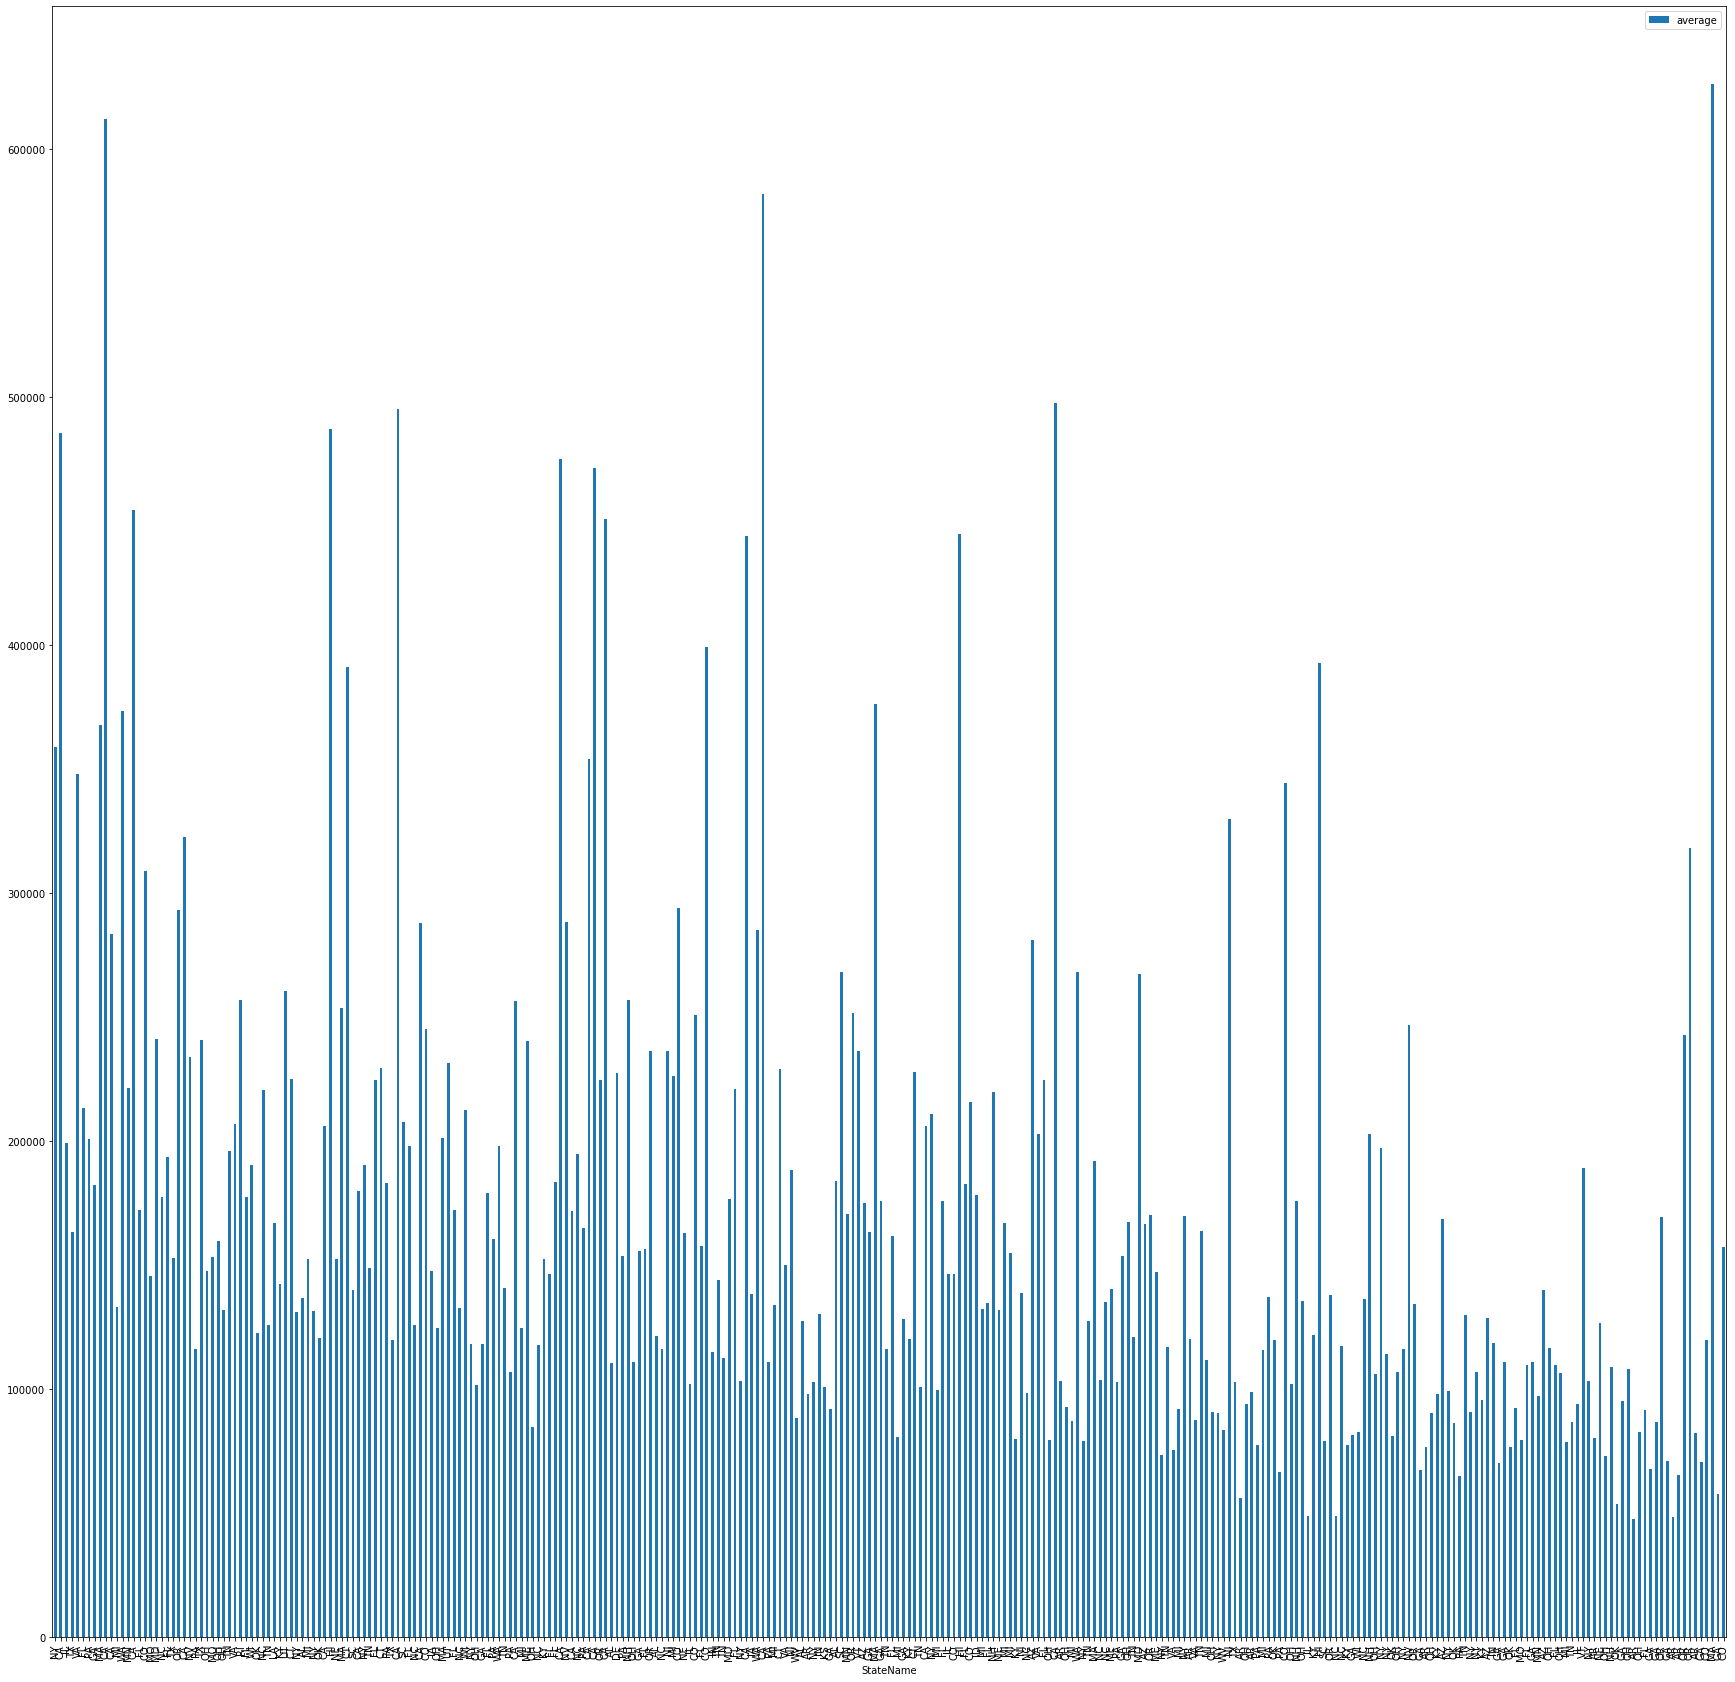

In [17]:
df4.plot(x="StateName", y=["average"],kind="bar", figsize=(30,30))
       
 

# Scatter plot 

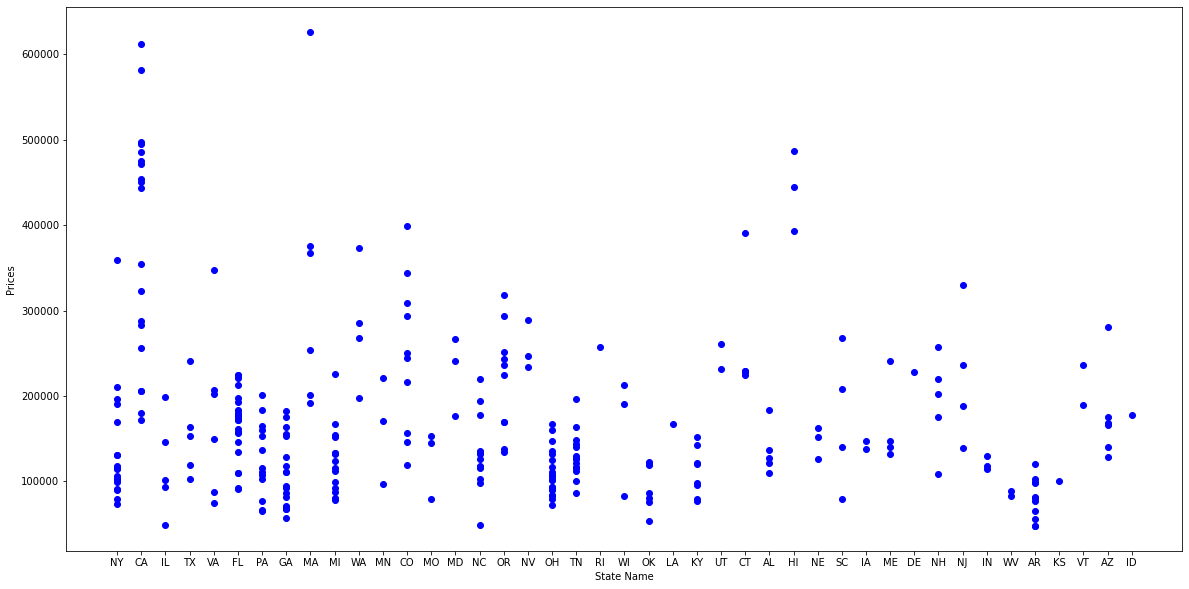

In [18]:
plt.xlabel('State Name')
plt.ylabel('Prices ')
plt.scatter(df4.StateName,df4.average, color='blue')

# Maximum value in each column

In [19]:
max_elements = df4.max()
print(max_elements)

SizeRank                 925
StateName                 WV
2000-01-31     291193.693235
2000-02-29     292405.238395
2000-03-31     293543.590618
                   ...      
2022-10-31     1357530.24777
2022-11-30    1358980.793012
2022-12-31    1360001.757447
2023-01-31    1360018.654357
average         626170.76004
Length: 280, dtype: object
